In [15]:
import numpy as np # for numerical operations
from moviepy.editor import VideoFileClip, AudioClip, concatenate
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy import signal
import pygame
import sys
np.set_printoptions(threshold=sys.maxsize)

SAMPLING_F = 44100
FIG_SIZE = [10, 5]

In [2]:
#clip = VideoFileClip("vs_HungKaTak_9.MPG") # 4 points: 1-5.5, 11.9-15.2, 40.5-49.5, 67.5-70.5
#clip = VideoFileClip("single_point_for_sound.mp4") # 5 points: 18-47, 51-64, 69-74, 81.5-84, 87-98
clip = VideoFileClip("ferdinand.mp4")
cut = lambda i: clip.audio.subclip(i,i+1).to_soundarray(fps=SAMPLING_F)
volume = lambda array: np.sqrt(((1.0*array)**2).mean())
volumes = [volume(cut(i)) for i in range(0,int(clip.duration-1))]

In [3]:
#clip.preview()

<IPython.core.display.Javascript object>


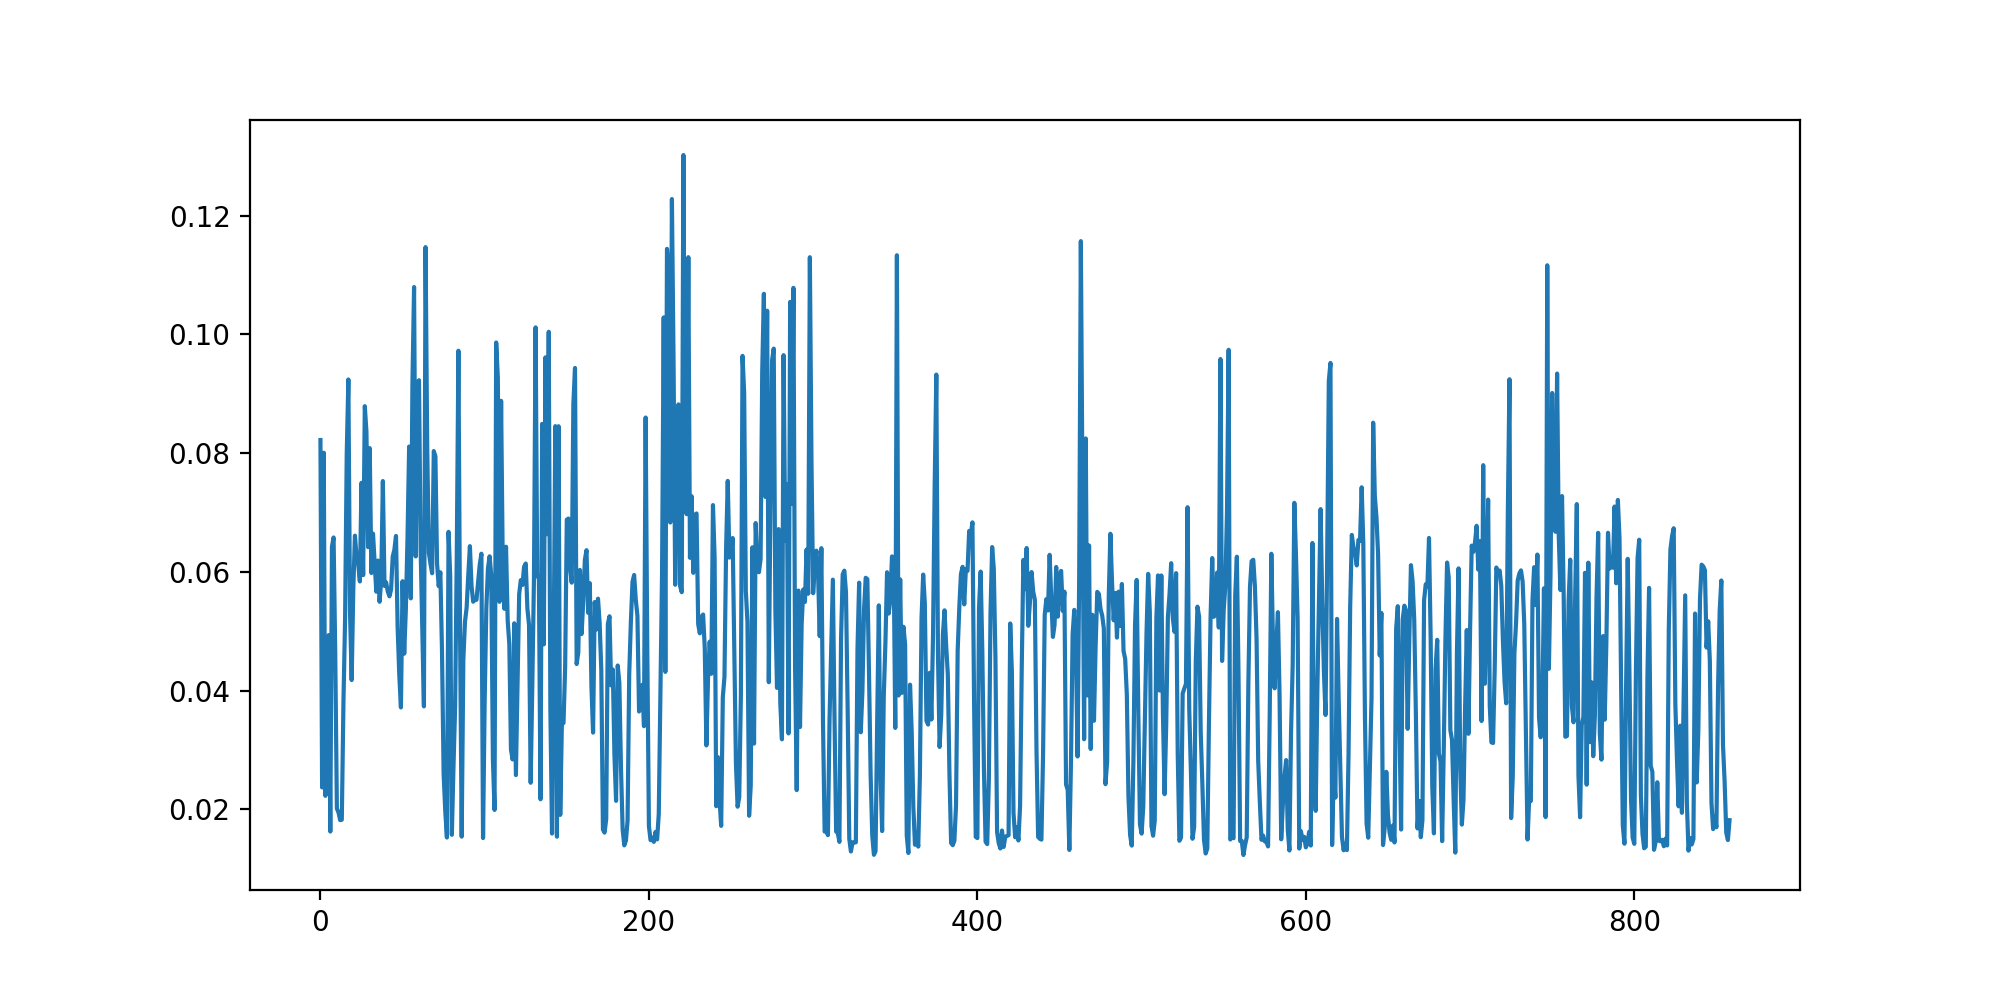

In [6]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = FIG_SIZE
plt.plot(volumes)
plt.show()

In [47]:
left, right = 0, 850

In [48]:
# %matplotlib notebook
arr = clip.audio.subclip(left, right).to_soundarray(fps=SAMPLING_F)
# plt.rcParams['figure.figsize'] = FIG_SIZE
# plt.plot([element[0] for element in arr])
# plt.plot([element[1] for element in arr])
# plt.show()

In [105]:
clip.audio.subclip(left, right).preview()

<IPython.core.display.Javascript object>


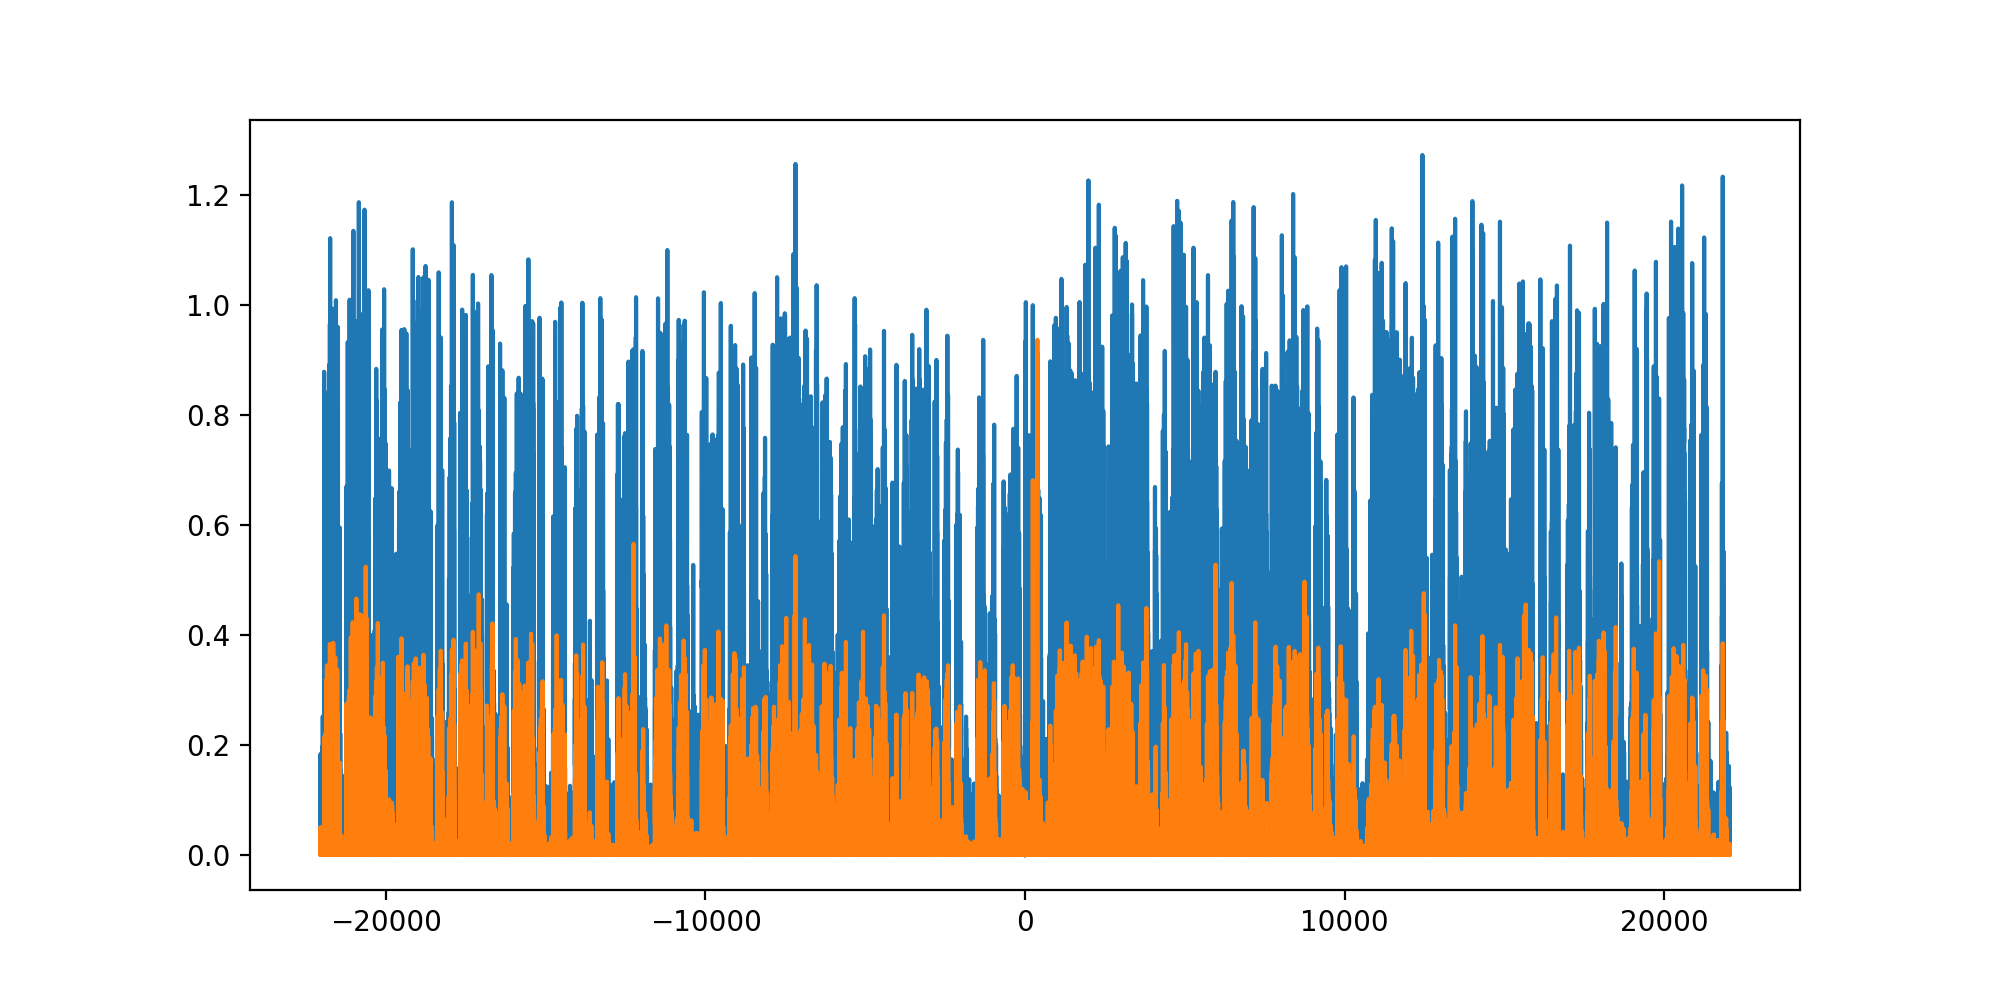

In [49]:
%matplotlib notebook
fft_out = fft(arr)
freqs = fftfreq(len(arr)) * SAMPLING_F
plt.rcParams['figure.figsize'] = FIG_SIZE
plt.plot(freqs, np.abs(fft_out))
plt.show()

<IPython.core.display.Javascript object>


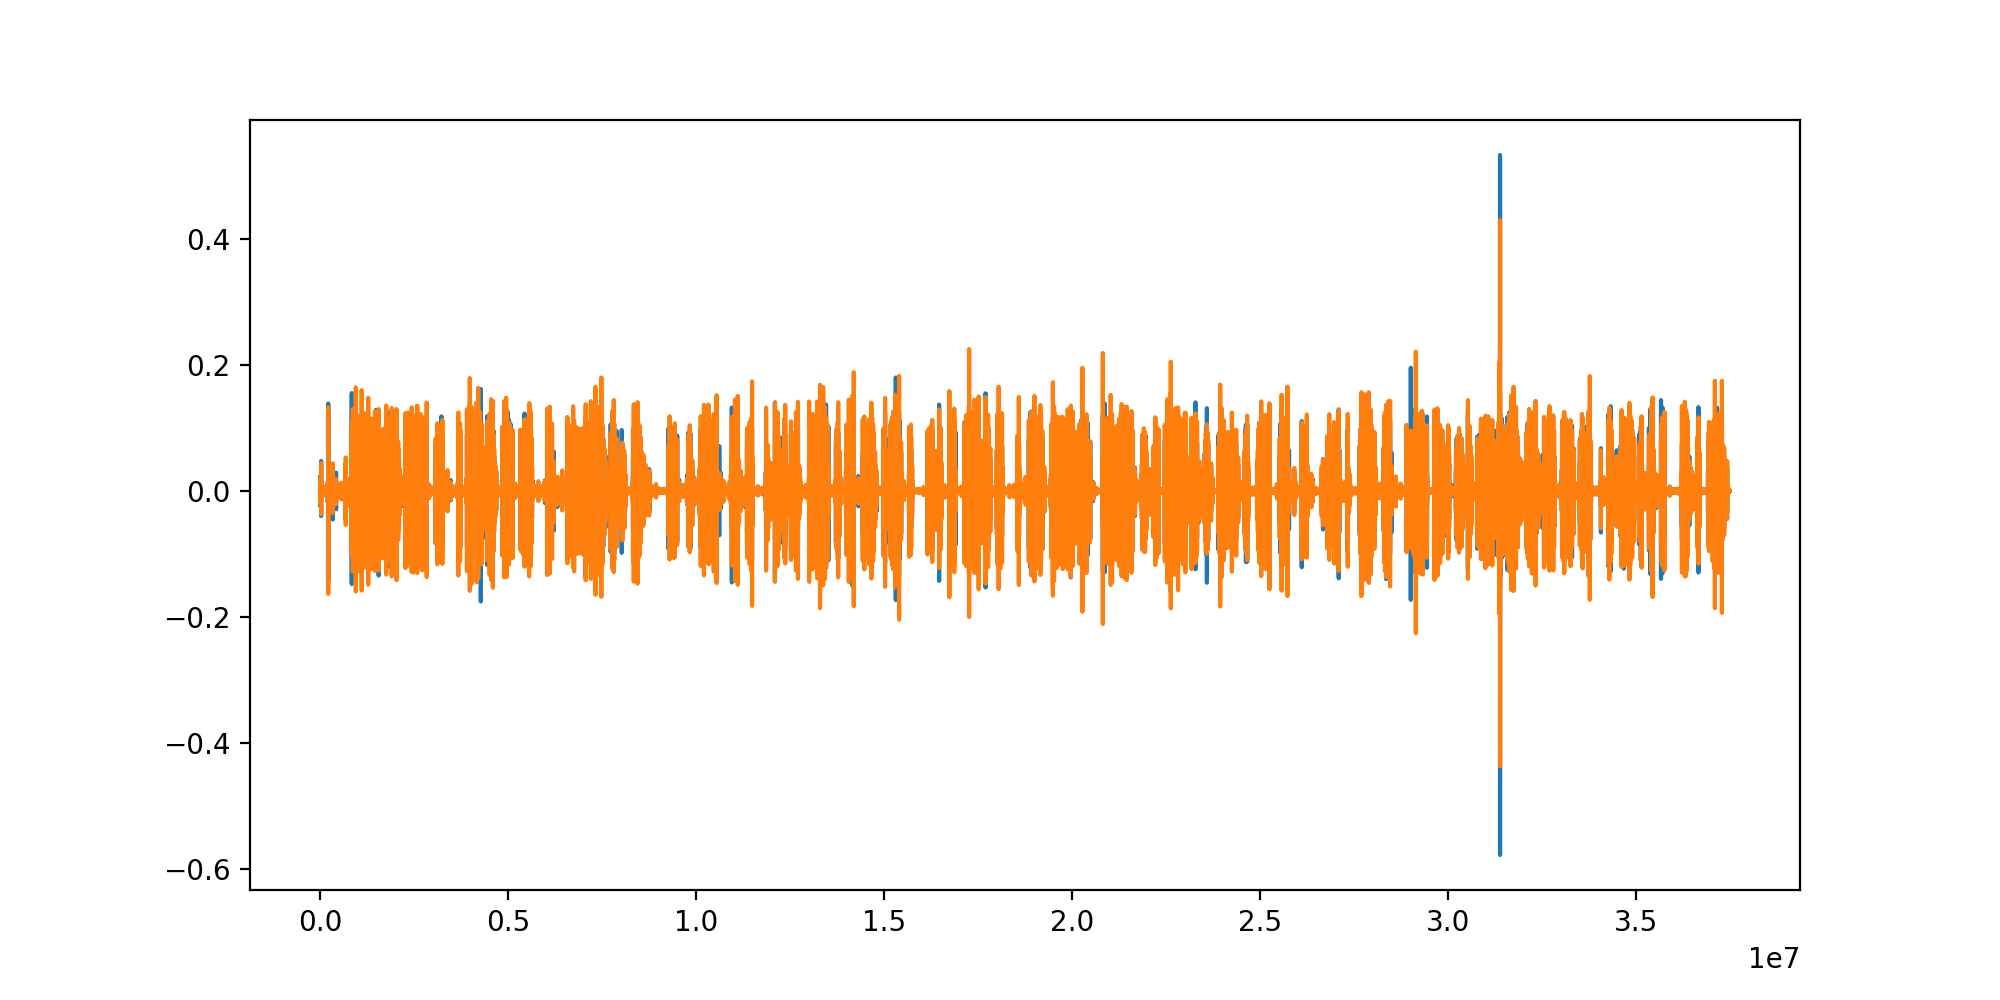

In [50]:
%matplotlib notebook
# 4 points: 793800-2072700, 2249100-2822400, 3042900-3263400, 3594150-3704400, 3836700-4321800
freq_filter = [8500 / (SAMPLING_F/2), 12000 / (SAMPLING_F/2)]
b, a = signal.butter(1, freq_filter, 'band')
left_o = signal.filtfilt(b, a, arr[:,0])
right_o = signal.filtfilt(b, a, arr[:,1])
plt.rcParams['figure.figsize'] = FIG_SIZE
plt.plot(left_o, label='filtered left')
plt.plot(right_o, label='filtered right')
plt.show()

In [51]:
time_to_extract = np.where(left_o > 0.05)[0]

In [52]:
intervals = []
start, end = -1, -1
for elem in time_to_extract:
    if start == -1 or elem - end > SAMPLING_F * 2:
        if start!= -1 and end != -1 and end - start > SAMPLING_F:
            intervals.append((start, end))
        start = elem
        end = elem
    else:
        end = elem
if start!= -1 and end != -1 and end - start > SAMPLING_F:
    intervals.append((start, end))
print(intervals)

[(820731, 2081043), (2262094, 2826289), (3065685, 3258358), (3667356, 3718823), (3897145, 4325106), (4432358, 4622805), (4838864, 5111644), (5317075, 5615847), (6029730, 6206477), (6569069, 6824044), (6918757, 7578818), (7720856, 7873733), (8014546, 8089644), (8315469, 8534000), (9253647, 9489626), (9789637, 9839321), (10098565, 10608649), (10943910, 11101131), (11347094, 11481461), (11854569, 11901233), (12090087, 12364256), (12624831, 12702881), (12999816, 13510737), (13713615, 13775294), (13989194, 14187829), (14425472, 14718254), (14974612, 15073417), (15163110, 15447320), (15662610, 15714716), (16160921, 16276157), (16457256, 16504051), (16730360, 16895042), (17132830, 17586805), (17693138, 17766865), (17992597, 18132245), (18843545, 19201965), (19437421, 20071345), (20195061, 20477801), (20813062, 21072656), (21171638, 21610535), (21857993, 21943450), (22162088, 22294452), (22461795, 23024510), (23171728, 23320078), (23523775, 23616074), (23887246, 24361254), (24575549, 24652850)

In [53]:
final = concatenate([clip.subclip(max(start/SAMPLING_F-0.5,0),min(end/SAMPLING_F+0.8, clip.duration))
                     for start, end in intervals])
final.to_videofile('ferdinand_cut2.mp4') # low quality is the default

chunk:   0%|          | 22/11277 [00:00<00:51, 218.73it/s, now=None]

Moviepy - Building video ferdinand_cut2.mp4.
MoviePy - Writing audio in %s


t:   0%|          | 14/15327 [00:00<01:57, 129.89it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video ferdinand_cut2.mp4



Moviepy - Done !
Moviepy - video ready ferdinand_cut2.mp4


In [15]:
freqs = fftfreq(len(left_o)) * SAMPLING_F
plt.rcParams['figure.figsize'] = FIG_SIZE
plt.plot(freqs, np.abs(fft(left_o)))
plt.plot(freqs, np.abs(fft(right_o)))
plt.show()

In [ ]:
from moviepy.audio.AudioClip import AudioArrayClip

AudioArrayClip(np.column_stack((left_o, right_o)) , fps=SAMPLING_F).preview()

In [26]:
#l, r = 15, 15.3 # high ball hitting Hung's table
#l, r = 15.65, 15.9 # Hung hits the ball
l, r = 40, 60 # Ball hits my side of the table
clip.audio.subclip(l, r).preview()

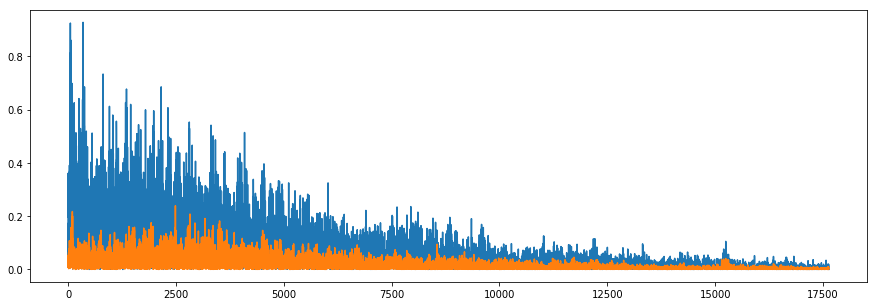

In [235]:
%matplotlib inline
arr = clip.audio.subclip(l, r).to_soundarray(fps=SAMPLING_F)
freqs = fftfreq(len(arr)) * SAMPLING_F
fft_out = fft(arr)
plt.rcParams['figure.figsize'] = FIG_SIZE
plt.plot(np.abs(fft_out))
plt.show()

In [236]:
left = np.abs(fft_out[:, 0])

In [237]:
left.argsort()[-30:][::-1]

array([ 346,   52,   61,   46,  340,   70,  810,   91,   94, 2157,  379,
         72,  352, 1353,   96,  344,  251,  336,   51, 1333,  142,  342,
       1450,   88,  348,  958,  100, 1361, 2314,   90])